In [ ]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf
import math
import matplotlib.dates as mdates

In [ ]:
dict = ['GOOG', 'AAPL','MSFT','AMZN','NVDA', 'TSLA']
valid_Input = False

In [ ]:
# User ticker selection
while not valid_Input:
    x = 0
    val = -1
    tickerSelection = "|| "
    for tickers in dict:
        tickerSelection += tickers + " [" + str(x) + "] || "
        x += 1
    tickerSelection += "\n"
    try:
        val = int(input("Please enter the number for the ticker you would like to track: \n" + tickerSelection))
    except:
        print("Please input integer only...")
    # print("Yo"val)
    if val >= 0 and val <= len(dict) -1:
        valid_Input = True
    else:
        print("Invalid input please try again \n\n")

Please enter the number for the ticker you would like to track: 
|| GOOG [0] || AAPL [1] || MSFT [2] || AMZN [3] || NVDA [4] || TSLA [5] || 
5


[*********************100%***********************]  1 of 1 completed


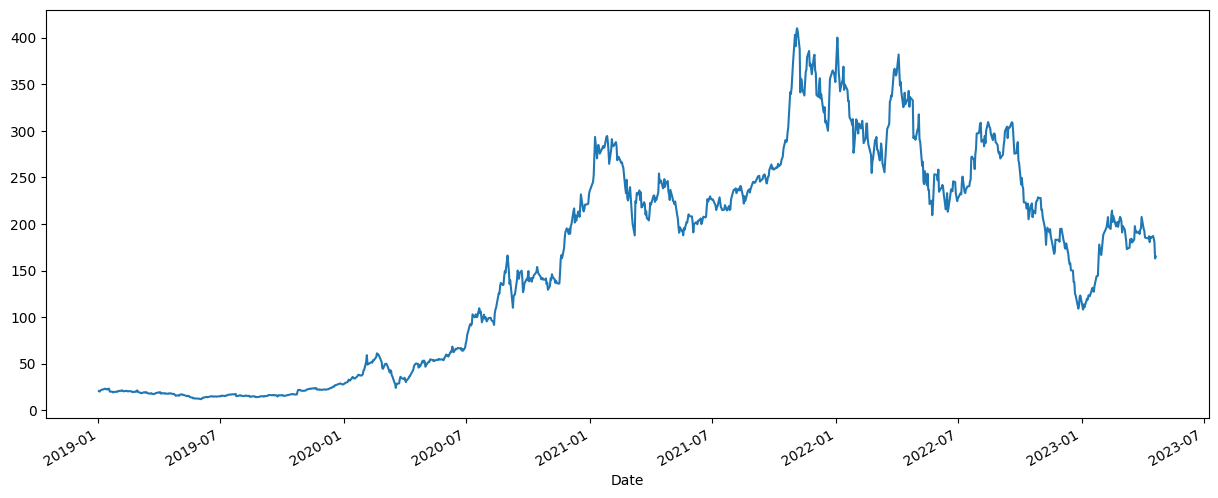

In [ ]:
ticker =  dict[val]
start = dt.datetime(2019, 1, 1)
end = dt.datetime.now()
data = yf.download(ticker, start , end)
# print(data)
data["Adj Close"].plot(figsize=(15,6))
# current_price=data[len(data)-1]
# print(current_price)
plt.show()

In [ ]:
def RSIPLOT(data):
    delta = data["Adj Close"].diff(1)
    delta.dropna(inplace=True)

    positive=delta.copy()
    negative=delta.copy()
    positive[positive < 0]=0
    negative[negative > 0]=0

    days=14
    average_gain = positive.rolling(window=days).mean();
    average_loss = abs(negative.rolling(window=days).mean());

    relative_strength = average_gain / average_loss
    RSI = 100.0 - (100.0 / (1.0 + relative_strength))

    combined= pd.DataFrame()
    combined['Adj Close'] = data['Adj Close']
    combined['RSI'] = RSI

    plt.plot(combined.index,combined['RSI'],color='red')
    plt.axhline(y=30, color='blue', linestyle='dashed')
    plt.axhline(y=70, color='blue', linestyle='dashed')
    plt.grid(True,color='#555555')

In [ ]:
def MACDPLOT(data):
    shortEMA = data["Close"].ewm(span=12,adjust=False).mean()
    longEMA = data["Close"].ewm(span=26,adjust=False).mean()
    MACD = shortEMA - longEMA
    signal = MACD.ewm(span=9, adjust=False).mean()
    plt.figure(figsize=(12,8))
    plt.plot(data.index,MACD,color='red',label='MACD')
    plt.plot(data.index,signal,color='blue',label='Signal')


In [ ]:
dataset = data

In [ ]:

def plot_stock_price(stock_price_data, name):
    plt.figure(figsize=(15,10))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=200))
    x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stock_price_data.index.values]

    plt.plot(x_dates, stock_price_data['High'], label='High')
    plt.plot(x_dates, stock_price_data['Low'], label='Low')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(name)
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.show()

In [ ]:
# plot_stock_price(dataset, "Alphabet")
# plot_stock_price(apple_stock_prices, "Apple")
# plot_stock_price(tesla_stock_prices, "Tesla")
# plot_stock_price(adani_stock_prices, "Adani")

In [ ]:
import numpy as np
import random
import operator

In [ ]:
NO_OF_GENERATIONS = 4
MUTATION_RATE = 3
POPULATION_SIZE = 750
NumReturn = 3

In [ ]:
class Chromosome():
    def __init__(self, min=None, max=None, prev_min=None, prev_max=None, buy=None, score=None):
        self.min = min
        self.max = max
        self.prev_min = prev_min
        self.prev_max = prev_max
        self.buy = buy
        self.score = score

    def mutate(self):
        mu, sigma = 0, 0.15 # mean and standard deviation
        s = np.random.normal(mu, sigma, 1)
        x = iter(s)
        toChange = random.randint(0,5)
        if toChange == 0:
           self.buy = random.randint(0,999) % 2
        if toChange == 1:
            self.min = next(x)
        if toChange == 2:
            self.max = next(x)
        if toChange == 3:
            self.prev_min = next(x)
        if toChange == 4:
            self.prev_max = next(x)
        if self.min > self.max:
            self.min, self.max = self.max, self.min
        if self.prev_min > self.prev_max:
            self.prev_min, self.prev_max = self.prev_max, self.prev_min

In [ ]:
dataset
# dataset['Adj Close'].tolist()
len(dataset)

1084

In [ ]:
class TrainingData():
    population = []
    nextGen = []
    dayChange = []
    nextDayChange = []
    profit = []

    def __init__(self, popSize = None, mRate = None, mChange = None):
        self.popSize = popSize
        self.mRate = mRate
        self.mChange = mChange

    def generateData(self):
        closes = dataset['Adj Close'].tolist()
        opens = dataset['Open'].tolist()
        file = open('stock_data', 'w')

        for i in range(len(dataset)-2):
            dayChangeVal = (float(closes[i])-float(opens[i+1])) / 100
            nextDayChangeVal = (float(closes[i+1]) - float(opens[i+2])) / 100
            profitVal = float(opens[i]) - float(opens[i+1])

            file.write(str(dayChangeVal) + ' ' + str(nextDayChangeVal) + ' ' + str(profitVal) + '\n')
            self.dayChange.append(dayChangeVal)
            self.nextDayChange.append(nextDayChangeVal)
            self.profit.append(profitVal)

        global DataSize
        DataSize = len(self.dayChange)
        file.close()

    def populationInit(self):
        mean = 0
        sd = 0.15  #standard deviation
        s = np.random.normal(mean, sd, 4*POPULATION_SIZE)
        it = iter(s)

        for i in range(POPULATION_SIZE):
            temp = Chromosome(next(it), next(it), next(it), next(it), random.randint(0, 999) % 2, 0)

            if temp.min > temp.max:
                temp.min, temp.max = temp.max, temp.min  #swap the values
            if temp.prev_min > temp.prev_max:
                temp.prev_min, temp.prev_max = temp.prev_max, temp.prev_min

            self.population.append(temp)

    def fitnessFunction(self):
        for i in range(len(self.population)):
            match = False
            for j in range(DataSize):
                if(self.population[i].prev_min < self.dayChange[j] and self.population[i].prev_max > self.dayChange[j]):
                    if(self.population[i].min < self.nextDayChange[j] and self.population[i].max > self.nextDayChange[j]):
                        if(self.population[i].buy == 1):
                            match = True
                            self.population[i].score += self.profit[j]

                #Match is found and we short
                if(self.population[i].prev_min < self.dayChange[j] and self.population[i].prev_max > self.dayChange[j]):
                    if(self.population[i].min < self.nextDayChange[j] and self.population[i].max > self.nextDayChange[j]):
                        if(self.population[i].buy == 0):
                            match = True
                            self.population[i].score -= self.profit[j]

                #We have not found any matches = -5000
                if match == False:
                    self.population[i].score = -5000

    def randomChoiceWeighted(self):
        self.exists()
        self.fitnessFunction()
        max = self.population[0].score
        for i in self.population[1:]:
            max += i.score

        pick = random.uniform(0, max)
        current = 0
        for i in range(len(self.population)):
            current += self.population[i].score
            if current > pick:
                self.nextGen.append(self.population[i])


    def exists(self):
        i = 0
        while i < len(self.population):
            if self.population[i].score is None:
                del self.population[i]
            else:
                i += 1

    def crossover(self,z):
        children = []

        for i in range(POPULATION_SIZE-len(self.nextGen)):
            child = Chromosome(0,0,0,0,0)
            chromosome1 = self.nextGen[random.randint(0,999999) % len(self.nextGen)]
            chromosome2 = self.nextGen[random.randint(0,999999) % len(self.nextGen)]
            if(random.randint(0,999) %2):
                child.min = chromosome1.min
                child.max = chromosome1.max
                child.prev_min = chromosome1.prev_min
                child.prev_max = chromosome1.prev_max
                child.buy = chromosome1.buy
            else:
                child.min = chromosome2.min
                child.min = chromosome2.max
                child.prev_min = chromosome2.prev_min
                child.prev_max = chromosome2.prev_max
                child.buy = chromosome2.buy

            if child.max < child.min:
                child.max, child.min = child.min, child.max

            if child.prev_max < child.prev_min:
                child.prev_max, child.prev_min = child.prev_min, child.prev_max

            children.append(child)

            for i in range(len(children)):
                if random.randint(0,999) % 100 <= z:
                    children[i].mutate()
                self.population[i] = children[i]

            print(f'Children {len(children)}')

            for i in range(len(children), len(self.population), 1):
                if i > len(children):
                    self.population[i] = self.nextGen[i-len(children)]
                else:
                    break

            self.exists()
            self.fitnessFunction()
            self.population.sort(key=operator.attrgetter('score'))

    def determineStockAction(self):
        buyData = []
        sellData = []
        for i in range(len(self.population)):
            if self.population[i].buy == 1:
                buyData.append(self.population[i])
            elif self.population[i].buy == 0:
                sellData.append(self.population[i])

        # plot(sellData)
        buyOutput = []
        sellOutput = []
        fieldnames=["Scores"]
        i=1
        size=len(buyData)
        while i < NumReturn+1:
          index = size-i
          print("Minimum %f | Maximum %f | Previous Min %f | Previous Max %f | Score %f" % (buyData[index].min, buyData[index].max, buyData[index].prev_min, buyData[index].prev_max, buyData[index].score))
          buyOutput.append(buyData[index].score)
          i += 1
        # print("The best Data when shorting" % (NumReturn))
        i = 1
        size = len(sellData)
        while i < NumReturn+1:
          index = size-i
          # print("Minimum %f | Maximum %f | Previous Min %f | Previous Max %f | Score %f" % (sellData[index].min, sellData[index].max, sellData[index].prev_min, sellData[index].prev_max, sellData[index].score))
          sellOutput.append(sellData[index].score)
          i += 1

        print('output scores when we buy today',buyData)
        print('output scores when we short today',sellData)

        my_list = []
        print(len(buyOutput), len(sellOutput))
        for i in range(len(buyOutput)):
            if buyOutput[i]>sellOutput[i]:
                my_list.append(1)
            else: my_list.append(0)
        avg=sum(my_list)/len(my_list)
        print(my_list)
        if avg>=0.5:
            print('Buy the Stock')
        else:
            print('Short/Sell the Stock')

In [ ]:
x = TrainingData()
x.generateData()
x.populationInit()
x.randomChoiceWeighted()
x.crossover(MUTATION_RATE)
x.determineStockAction()

Children 1
Children 2
Children 3
Children 4
Children 5
Children 6
Children 7
Children 8
Children 9
Children 10
Children 11
Children 12
Children 13
Children 14
Children 15
Children 16
Children 17
Children 18
Children 19
Children 20
Children 21
Children 22
Children 23
Children 24
Children 25
Children 26
Children 27
Children 28
Children 29
Children 30
Children 31
Children 32
Children 33
Children 34
Children 35
Children 36
Children 37
Children 38


IndexError: ignored